# Clustering the data


Loading the data




In [25]:
from IPython.display import Image
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
data = read_csv('driver_features.txt', delimiter='\t',header=None)
X=data.iloc[:, 1:7].values
Y=data.iloc[:,7].values

Checking for optimal number of cluster

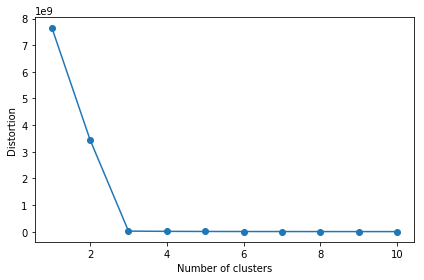

Distortion: 5683302.98


In [27]:

distortions = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()
print('Distortion: %.2f' % km.inertia_)

It seems from the elbow test that the number of cluster is 5. So let us try with number of cluster as 5

In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=3000,
            tol=1e-10,
            random_state=0)

y_km = km.fit_predict(X)


CLustering is done. Now it is time to plot them properly

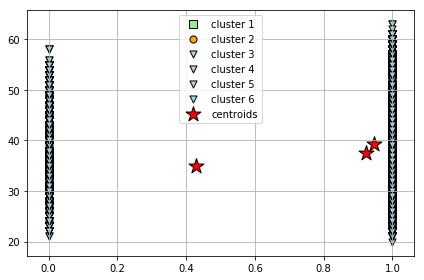

In [24]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(X[y_km == 3, 0],
            X[y_km == 3, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 4')
plt.scatter(X[y_km == 4, 0],
            X[y_km == 4, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 5')
plt.scatter(X[y_km == 5, 0],
            X[y_km == 5, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 6')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

# We plan to do cluster for a subset of the data and see if we can get any information from the same

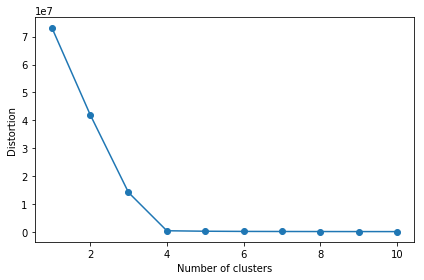

Distortion: 94721.51


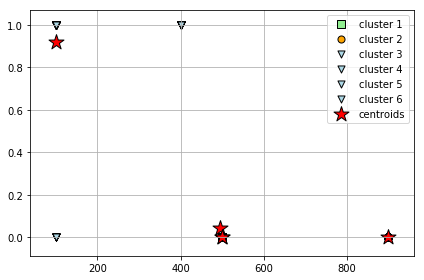

In [16]:
X=data.iloc[:1000, 0:7].values
Y=data.iloc[:1000:,7].values

distortions = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()
print('Distortion: %.2f' % km.inertia_)
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, 
            init='random', 
            n_init=10, 
            max_iter=3000,
            tol=1e-10,
            random_state=0)

y_km = km.fit_predict(X)
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(X[y_km == 3, 0],
            X[y_km == 3, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 4')
plt.scatter(X[y_km == 4, 0],
            X[y_km == 4, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 5')
plt.scatter(X[y_km == 5, 0],
            X[y_km == 5, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 6')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

The number of optimal clusters now is 4. 
We tried getting numebr of optimal clusters by varrying the number of data points. 
We found that uptill 0-15k data points, the number of optimal clusters is 4 while for data points beyond 15k it becomes 5

## It does not give any information. So lets us try with Normalized Data 

In [8]:
normalized_data=(data-data.mean())/data.std()
X=normalized_data.iloc[:, 0:7].values
Y=normalized_data.iloc[:,7].values

Finding the optimal number of Cluster when data is normalized . We are doing mean normalization

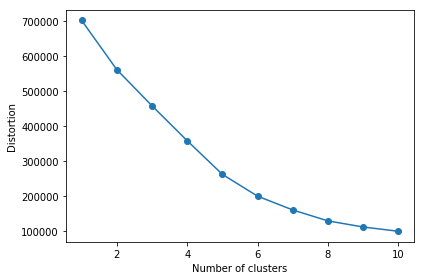

Distortion: 98573.60


In [9]:

distortions = []
from sklearn.cluster import KMeans
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()
print('Distortion: %.2f' % km.inertia_)

It does not seem to give a good result with iteration 11. Lets make it 15

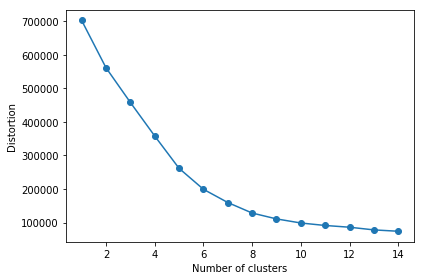

Distortion: 73973.85


In [11]:
distortions = []
from sklearn.cluster import KMeans
for i in range(1, 15):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()
print('Distortion: %.2f' % km.inertia_)

Even with 14 also we are not getting any information. Let us make it 20 

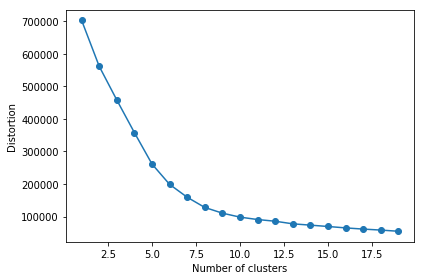

Distortion: 55204.19


In [12]:
distortions = []
from sklearn.cluster import KMeans
for i in range(1, 20):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()
print('Distortion: %.2f' % km.inertia_)

Elbow test is not giving any conclusive information for the normalized data set


### Now we try our hand on heirachical clustering and se how it goes

In order to calculate the hierarchical clustering, We first calculate the distances between any two pairs of points

In [ ]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(data, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

This is where it takes a lot of time to calculate the distance for 100k data points. I waited for around two hours to get he results but could not get